In [1]:
### EDA 
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
df = pd.read_csv('sample_data/housing.csv')


In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:

df.describe().round(decimals=2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


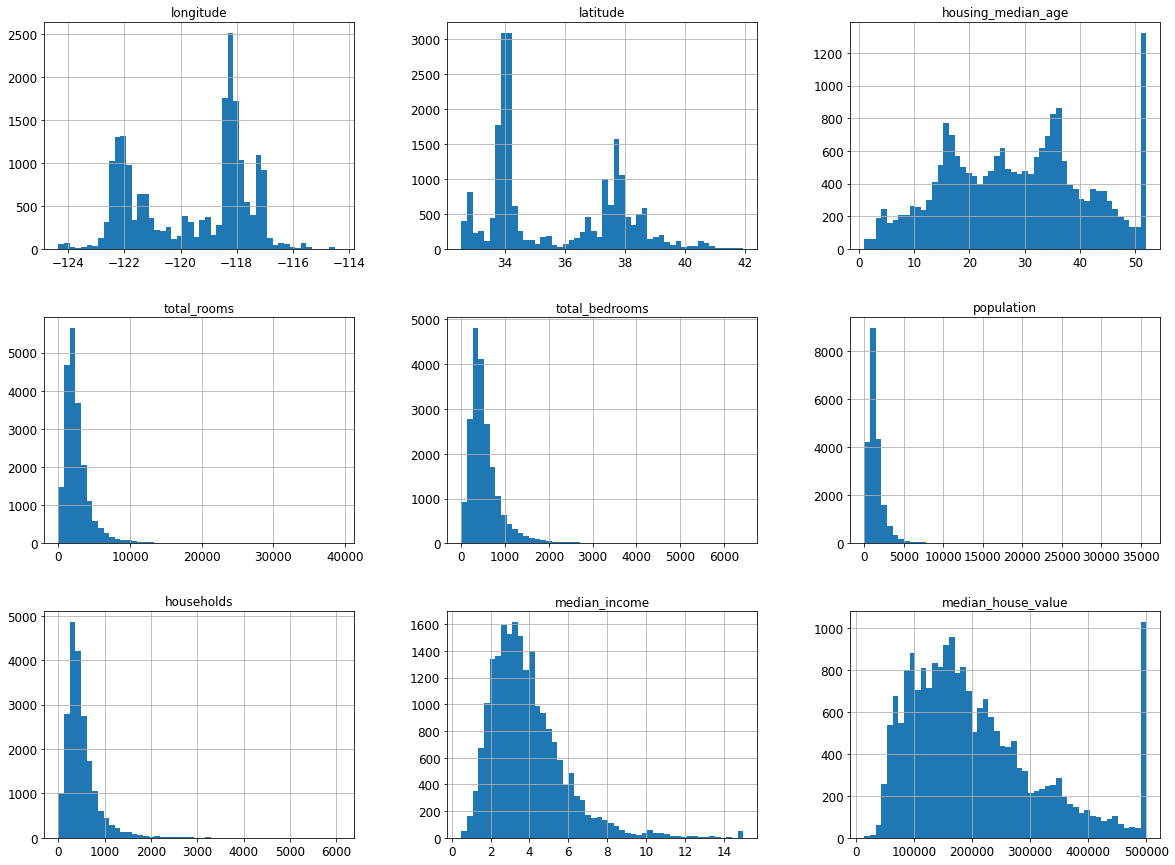

In [6]:

df.hist(bins=50, figsize=(20,15))

plt.show()

In [7]:
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


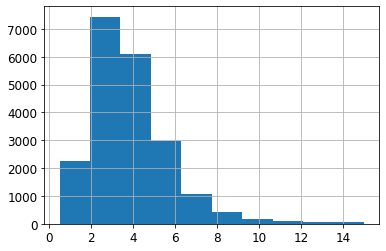

In [8]:
df["median_income"].hist()

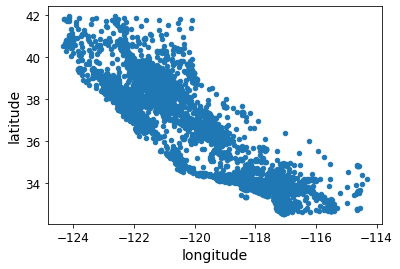

In [9]:
df.plot(kind="scatter", x="longitude", y="latitude")

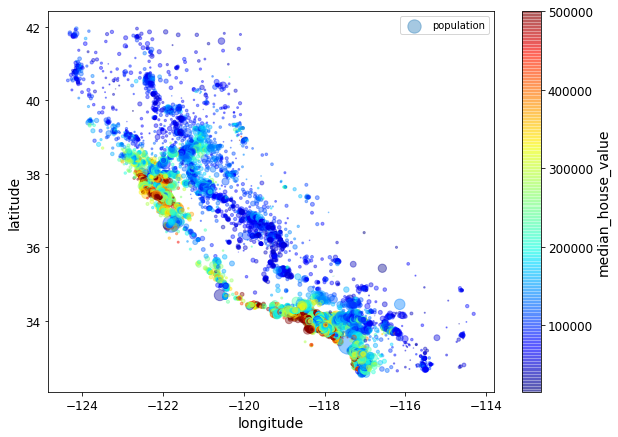

In [10]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

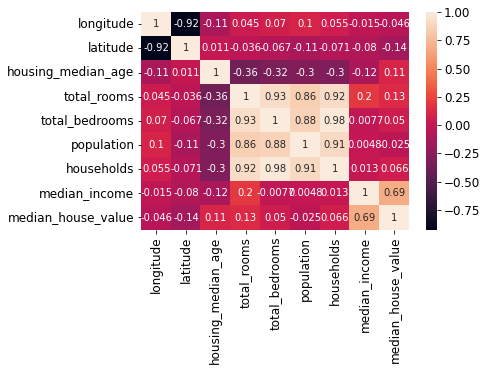

In [11]:
import seaborn as sns
corr_matrix=df.corr()

sns.heatmap(corr_matrix, annot = True)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c181c4b10>,
      dtype=object)

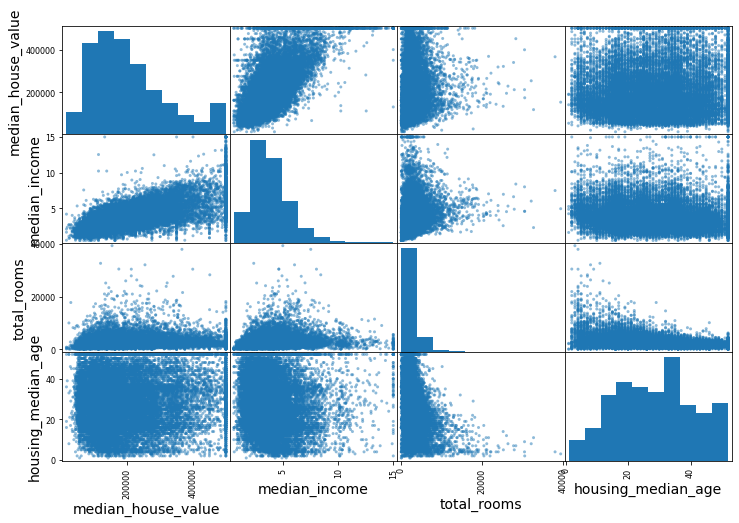

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

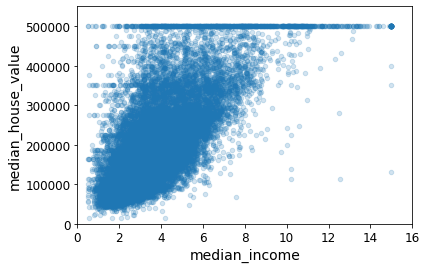

In [13]:
df.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.2)
plt.axis([0, 16, 0, 550000])


In [14]:
###pyspark 

import os
import pandas as pd
import numpy as np

# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark


In [15]:
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# setting random seed for notebook reproducability
rnd_seed=23
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

In [18]:
spark = SparkSession.builder.master("local[2]").appName("Linear-Regression-California-Housing").getOrCreate()

In [19]:
sc = spark.sparkContext
sc

<SparkContext master=local[2] appName=Linear-Regression-California-Housing>

In [20]:
sqlContext = SQLContext(spark.sparkContext)
sqlContext

In [21]:
HOUSING_DATA = 'sample_data/housing.csv'

In [22]:
schema = StructType([
    StructField("long", FloatType(), nullable=True),
    StructField("lat", FloatType(), nullable=True),
    StructField("medage", FloatType(), nullable=True),
    StructField("totrooms", FloatType(), nullable=True),
    StructField("totbdrms", FloatType(), nullable=True),
    StructField("pop", FloatType(), nullable=True),
    StructField("houshlds", FloatType(), nullable=True),
    StructField("medinc", FloatType(), nullable=True),
    StructField("medhv", FloatType(), nullable=True)]
)

In [23]:
# Load housing data
housing_df = spark.read.csv(path=HOUSING_DATA, schema=schema).cache()

In [24]:
# Show first five rows

housing_df=housing_df.na.drop()

In [25]:
housing_df.show(5)

+-------+-----+------+--------+--------+------+--------+------+--------+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|   medhv|
+-------+-----+------+--------+--------+------+--------+------+--------+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|452600.0|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|358500.0|
|-122.24|37.85|  52.0|  1467.0|   190.0| 496.0|   177.0|7.2574|352100.0|
|-122.25|37.85|  52.0|  1274.0|   235.0| 558.0|   219.0|5.6431|341300.0|
|-122.25|37.85|  52.0|  1627.0|   280.0| 565.0|   259.0|3.8462|342200.0|
+-------+-----+------+--------+--------+------+--------+------+--------+
only showing top 5 rows



In [26]:
# show the dataframe columns
housing_df.columns

['long',
 'lat',
 'medage',
 'totrooms',
 'totbdrms',
 'pop',
 'houshlds',
 'medinc',
 'medhv']

In [27]:
# show the schema of the dataframe
housing_df.printSchema()

root
 |-- long: float (nullable = true)
 |-- lat: float (nullable = true)
 |-- medage: float (nullable = true)
 |-- totrooms: float (nullable = true)
 |-- totbdrms: float (nullable = true)
 |-- pop: float (nullable = true)
 |-- houshlds: float (nullable = true)
 |-- medinc: float (nullable = true)
 |-- medhv: float (nullable = true)



In [28]:
# Add the new columns to `df`
housing_df = (housing_df.withColumn("rmsperhh", F.round(col("totrooms")/col("houshlds"), 2))
                       .withColumn("popperhh", F.round(col("pop")/col("houshlds"), 2))
                       .withColumn("bdrmsperrm", F.round(col("totbdrms")/col("totrooms"), 2)))

In [29]:
# Inspect the result
housing_df.show(5)

+-------+-----+------+--------+--------+------+--------+------+--------+--------+--------+----------+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|   medhv|rmsperhh|popperhh|bdrmsperrm|
+-------+-----+------+--------+--------+------+--------+------+--------+--------+--------+----------+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|452600.0|    6.98|    2.56|      0.15|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|358500.0|    6.24|    2.11|      0.16|
|-122.24|37.85|  52.0|  1467.0|   190.0| 496.0|   177.0|7.2574|352100.0|    8.29|     2.8|      0.13|
|-122.25|37.85|  52.0|  1274.0|   235.0| 558.0|   219.0|5.6431|341300.0|    5.82|    2.55|      0.18|
|-122.25|37.85|  52.0|  1627.0|   280.0| 565.0|   259.0|3.8462|342200.0|    6.28|    2.18|      0.17|
+-------+-----+------+--------+--------+------+--------+------+--------+--------+--------+----------+
only showing top 5 rows



In [30]:
featureCols = [ "pop", "houshlds", "medinc", "rmsperhh", "popperhh", "bdrmsperrm"]

In [31]:
featureCols = ["long","lat","medage","totrooms","totbdrms", "pop", "houshlds", "medinc", "rmsperhh", "popperhh", "bdrmsperrm"]

In [32]:
# put features into a feature vector column
assembler = VectorAssembler(inputCols=featureCols, outputCol="features") 
assembled_df = assembler.transform(housing_df)
assembled_df.show(5)


+-------+-----+------+--------+--------+------+--------+------+--------+--------+--------+----------+--------------------+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|   medhv|rmsperhh|popperhh|bdrmsperrm|            features|
+-------+-----+------+--------+--------+------+--------+------+--------+--------+--------+----------+--------------------+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|452600.0|    6.98|    2.56|      0.15|[-122.23000335693...|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|358500.0|    6.24|    2.11|      0.16|[-122.22000122070...|
|-122.24|37.85|  52.0|  1467.0|   190.0| 496.0|   177.0|7.2574|352100.0|    8.29|     2.8|      0.13|[-122.23999786376...|
|-122.25|37.85|  52.0|  1274.0|   235.0| 558.0|   219.0|5.6431|341300.0|    5.82|    2.55|      0.18|[-122.25,37.84999...|
|-122.25|37.85|  52.0|  1627.0|   280.0| 565.0|   259.0|3.8462|342200.0|    6.28|    2.18|      0.17|[-122.25,37.84999...|
+-------+-----+-

In [33]:
output=assembler.transform(housing_df)
f_data=output.select('features','medhv')
f_data.show(5)


+--------------------+--------+
|            features|   medhv|
+--------------------+--------+
|[-122.23000335693...|452600.0|
|[-122.22000122070...|358500.0|
|[-122.23999786376...|352100.0|
|[-122.25,37.84999...|341300.0|
|[-122.25,37.84999...|342200.0|
+--------------------+--------+
only showing top 5 rows



In [34]:
train_data,test_data= f_data.randomSplit([0.80,0.20])

In [35]:
regressor=LinearRegression(featuresCol='features',labelCol='medhv')
regressor=regressor.fit(train_data)

In [36]:
coeff=regressor.coefficients
intr=regressor.intercept


print("The coefficient of the model is found to be: %a" %coeff)
print("The intercept of the model is found to be: %f" %intr)

The coefficient of the model is found to be: DenseVector([-41156.3499, -40760.394, 1169.5433, 3.3467, 12.0544, -47.6543, 118.0876, 42378.232, 2615.44, 133.3619, 314308.8321])
The intercept of the model is found to be: -3547735.942228


In [37]:
pred= regressor.evaluate(test_data)
pred.predictions.show(5)

+--------------------+--------+------------------+
|            features|   medhv|        prediction|
+--------------------+--------+------------------+
|[-124.26000213623...|111400.0|158144.72498339647|
|[-124.23000335693...|106700.0|184980.28833242878|
|[-124.23000335693...| 50800.0| 181998.1440601102|
|[-124.23000335693...| 73200.0| 69245.12475483771|
|[-124.22000122070...| 78300.0| 76036.36968083726|
+--------------------+--------+------------------+
only showing top 5 rows



In [38]:
from pyspark.ml.evaluation import RegressionEvaluator
eval=RegressionEvaluator(labelCol='medhv',predictionCol='prediction',metricName='rmse')

rmse=eval.evaluate(pred.predictions)
print("RMSE : %.3f" %rmse)

mse=eval.evaluate(pred.predictions,{eval.metricName:"mse"})
print("MSE : %.3f" %mse)

mae=eval.evaluate(pred.predictions,{eval.metricName:"mae"})
print("MAE : %.3f" % mae)

r2=eval.evaluate(pred.predictions,{eval.metricName:"r2"})
print("r2 : %.3f" %r2)

predtrain= regressor.evaluate(train_data)
r2=eval.evaluate(predtrain.predictions,{eval.metricName:"r2"})
print("r2train : %.3f" %r2)



RMSE : 70865.789
MSE : 5021960069.405
MAE : 50229.761
r2 : 0.629
r2train : 0.650


In [39]:
from pyspark.ml.regression import GeneralizedLinearRegression
glr = GeneralizedLinearRegression(featuresCol='features',labelCol='medhv',family="gaussian", link="identity", maxIter=10, regParam=0.3)

# Fit the model
model = glr.fit(train_data)

In [40]:
# Print the coefficients and intercept for generalized linear regression model
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

Coefficients: [-41154.69746373136,-40758.764065507334,1169.56968182358,3.3461945977669965,12.06489040074759,-47.65243775406556,118.0740901377546,42378.510941702945,2615.1455706883426,133.34111731511058,314303.8050803915]
Intercept: -3547595.712418508


In [41]:
predglm= model.evaluate(test_data)
predglm.predictions.show(5)

+--------------------+--------+------------------+
|            features|   medhv|        prediction|
+--------------------+--------+------------------+
|[-124.26000213623...|111400.0| 158144.7613486303|
|[-124.23000335693...|106700.0|184980.44079323998|
|[-124.23000335693...| 50800.0|181999.29107302707|
|[-124.23000335693...| 73200.0|  69247.0079810475|
|[-124.22000122070...| 78300.0| 76037.80230517453|
+--------------------+--------+------------------+
only showing top 5 rows



In [42]:
from pyspark.ml.evaluation import RegressionEvaluator
eval=RegressionEvaluator(labelCol='medhv',predictionCol='prediction',metricName='rmse')

rmse=eval.evaluate(predglm.predictions)
print("RMSE : %.3f" %rmse)

mse=eval.evaluate(predglm.predictions,{eval.metricName:"mse"})
print("MSE : %.3f" %mse)

mae=eval.evaluate(predglm.predictions,{eval.metricName:"mae"})
print("MAE : %.3f" % mae)

r2=eval.evaluate(predglm.predictions,{eval.metricName:"r2"})
print("r2 : %.3f" %r2)

predglmtrain= model.evaluate(train_data)
r2=eval.evaluate(predglmtrain.predictions,{eval.metricName:"r2"})
print("r2train : %.3f" %r2)



RMSE : 70865.679
MSE : 5021944404.017
MAE : 50229.723
r2 : 0.629
r2train : 0.650


In [43]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'medhv')
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)
dt_evaluator = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

dt_evaluator1 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="mse")
mse = dt_evaluator1.evaluate(dt_predictions)
print(" Mean Squared Error (MSE) on test data = %g" % mse)

dt_evaluator2 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="mae")
mae = dt_evaluator2.evaluate(dt_predictions)
print(" Mean absolute Error  on test data = %g" % mae)

dt_evaluator3 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator3.evaluate(dt_predictions)
print("R  Squared Error on test data = %g" % r2)


dtpredtrain= dt_model.transform(train_data)
dt_evaluator4 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="r2")
r2train = dt_evaluator4.evaluate(dtpredtrain)
print("R  Squared Error on train data = %g" % r2train)




Root Mean Squared Error (RMSE) on test data = 74001.8
 Mean Squared Error (MSE) on test data = 5.47626e+09
 Mean absolute Error  on test data = 53221.9
R  Squared Error on test data = 0.595595
R  Squared Error on train data = 0.626482


In [44]:
from pyspark.ml.regression import GBTRegressor

from pyspark.ml import Pipeline
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.ml.feature import VectorIndexer
from sklearn.model_selection import GridSearchCV
featureIndexer =VectorIndexer(inputCol="features", outputCol="outputfeatures", maxCategories=4).fit(f_data)

gbt = GBTRegressor(featuresCol="outputfeatures",labelCol = 'medhv',maxIter=10)
pipeline = Pipeline(stages=[featureIndexer, gbt])
paramGrid = ParamGridBuilder().addGrid(gbt.maxDepth, [4,6,10]).addGrid(gbt.subsamplingRate, [0.9, 0.5, 0.1]).addGrid(gbt.maxBins, [10,30,50]).build()
tvs = TrainValidationSplit(estimator=pipeline,
                           estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator().setLabelCol("medhv"),
                           # 80% of the data will be used for training, 20% for validation.
                          trainRatio=0.8)

tvs_model = tvs.fit(train_data)

In [45]:
####Tuninggggggggg
gbt_predictions_tuned = tvs_model.transform(test_data)
gbt_predictions_tuned.select('prediction', 'medhv', 'features').show(5)

gbt_evaluator_tuned = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="r2")
r2 = gbt_evaluator_tuned.evaluate(gbt_predictions_tuned)
print("R  Squared Error on test data tuned = %g" % r2)

+------------------+--------+--------------------+
|        prediction|   medhv|            features|
+------------------+--------+--------------------+
| 81991.83873481833|111400.0|[-124.26000213623...|
| 94768.08936291133|106700.0|[-124.23000335693...|
|182307.65748622644| 50800.0|[-124.23000335693...|
|  92843.3785439172| 73200.0|[-124.23000335693...|
| 77671.76811834122| 78300.0|[-124.22000122070...|
+------------------+--------+--------------------+
only showing top 5 rows

R  Squared Error on test data tuned = 0.728003


In [46]:
###without tuning
gbt_model = pipeline.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.select('prediction', 'medhv', 'features').show(5)

+------------------+--------+--------------------+
|        prediction|   medhv|            features|
+------------------+--------+--------------------+
| 71435.55418424545|111400.0|[-124.26000213623...|
|206571.56097374615|106700.0|[-124.23000335693...|
|   198617.46678276| 50800.0|[-124.23000335693...|
|108898.90007004293| 73200.0|[-124.23000335693...|
| 73327.74457576915| 78300.0|[-124.22000122070...|
+------------------+--------+--------------------+
only showing top 5 rows



In [47]:
##without tuning
gbt_evaluator = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

gbt_evaluator1 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="mse")
mse = gbt_evaluator1.evaluate(gbt_predictions)
print(" Mean Squared Error (MSE) on test data = %g" % mse)

gbt_evaluator2 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="mae")
mae = gbt_evaluator2.evaluate(gbt_predictions)
print(" Mean absolute Error  on test data = %g" % mae)

gbt_evaluator3 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="r2")
r2 = gbt_evaluator3.evaluate(gbt_predictions)
print("R  Squared Error on test data = %g" % r2)

gbttrain= gbt_model.transform(train_data)
gbt_evaluator4 = RegressionEvaluator(
    labelCol="medhv", predictionCol="prediction", metricName="r2")
r2train = gbt_evaluator4.evaluate(gbttrain)
print("R  Squared Error on train data = %g" % r2train)



Root Mean Squared Error (RMSE) on test data = 62372
 Mean Squared Error (MSE) on test data = 3.89027e+09
 Mean absolute Error  on test data = 42864.1
R  Squared Error on test data = 0.712716
R  Squared Error on train data = 0.742497


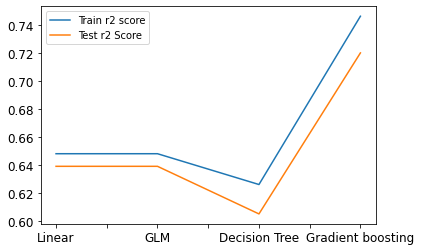

In [48]:
df = pd.DataFrame({'Train r2 score': [0.648,0.648,0.626,0.7462],
                   'Test r2 Score': [0.639,0.639,0.605,0.72]},
                  index=['Linear', 'GLM', 'Decision Tree', 'Gradient boosting'])
df.plot.line()  


In [49]:
spark.stop()

https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-regression
